In [2]:
# Importamos las librerias
import fastf1 as f1
import fastf1.plotting
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')

In [10]:
colors = {
    "McLaren": "#FF8C00",
    "Ferrari": "#FF0000",
    "Red Bull": "#1E41FF",
    "Mercedes": "#00D2BE",
    "Aston Martin": "#008000",
    "Alpine": "#FF1493",
    "Haas": "#B6BABD",
    "RB": "#6692FF",
    "Williams": "#6495ED",
    "Sauber": "#7FFF00"
}
teams = ['Red Bull', 'Mercedes', 'Alpine', 'Haas', 'RB', 'Sauber']
team_colors = [colors[team] for team in teams]

In [4]:
# Cargamos una carpeta cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [5]:
# Cargamos los datos del AUSTRALIAN GRAND PRIX 2025
sesion = f1.get_session(2025, 1, 'FP1')

In [6]:
# Sesion, nombre y fecha de la carrera
print(sesion.name)
print(sesion.event.OfficialEventName)
print(sesion.date)

Practice 1
FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX 2025
2025-03-14 01:30:00


In [7]:
# Cargamos la informacion de la carrera
sesion.load()

core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']


In [8]:
lap = sesion.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = sesion.get_circuit_info()

import numpy as np
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

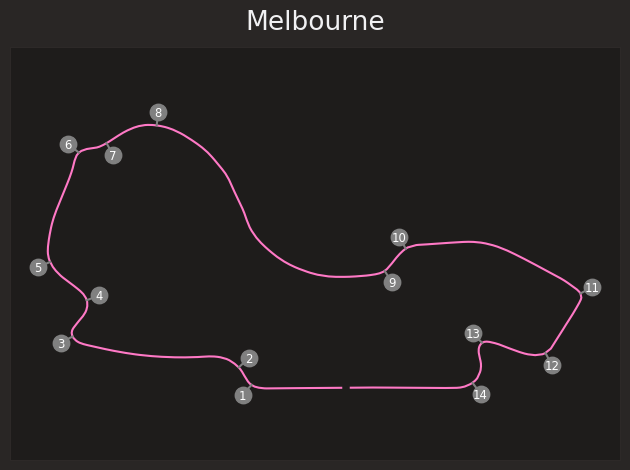

In [9]:
# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
    
plt.title(sesion.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/info_circuit.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Diferencia de los Rookies con su compañeros de equipo

In [42]:
# Diferencia entre los pilotos Red Bull
ver_lap = sesion.laps.pick_drivers("VER").pick_fastest()
law_lap = sesion.laps.pick_drivers("LAW").pick_fastest()
dif_redbull = law_lap["LapTime"] - ver_lap["LapTime"]

# Diferenia entre los pilotos Mercedes
rus_lap = sesion.laps.pick_drivers("RUS").pick_fastest()
ant_lap = sesion.laps.pick_drivers("ANT").pick_fastest()
dif_mercedes = ant_lap["LapTime"] - rus_lap["LapTime"]

# Diferencia entre los pilotos Alpine
gas_lap = sesion.laps.pick_drivers("GAS").pick_fastest()
doo_lap = sesion.laps.pick_drivers("DOO").pick_fastest()
dif_alpine = gas_lap["LapTime"] - doo_lap["LapTime"]

# Diferencia entre los pilotos Haas
oco_lap = sesion.laps.pick_drivers("OCO").pick_fastest()
bea_lap = sesion.laps.pick_drivers("BEA").pick_fastest()
dif_haas = bea_lap["LapTime"] - oco_lap["LapTime"]

# Diferencia entre los pilotos RB
tsu_lap = sesion.laps.pick_drivers("TSU").pick_fastest()
had_lap = sesion.laps.pick_drivers("HAD").pick_fastest()
dif_rb = tsu_lap["LapTime"] - had_lap["LapTime"]

# Diferencia entre los pilotos Sauber
hul_lap = sesion.laps.pick_drivers("HUL").pick_fastest()
bor_lap = sesion.laps.pick_drivers("BOR").pick_fastest()
dif_sauber = hul_lap["LapTime"] - bor_lap["LapTime"]

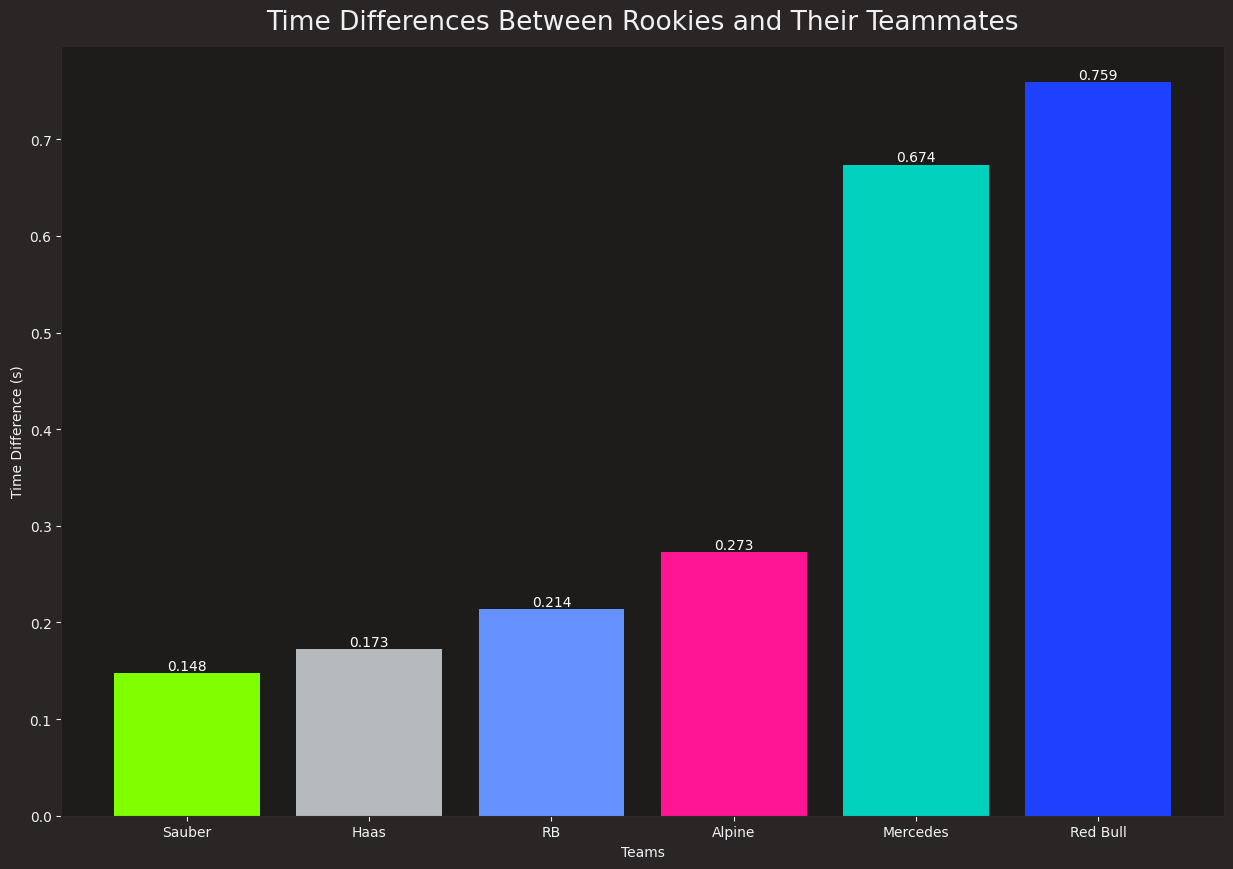

In [ ]:
# Grafico de barras de las diferencias entre los pilotos con los Rookies
fig, ax = plt.subplots(figsize=(15, 10))

# Datos para el gráfico
gaps = [dif_redbull.total_seconds(), dif_mercedes.total_seconds(), dif_alpine.total_seconds(), dif_haas.total_seconds(), dif_rb.total_seconds(), dif_sauber.total_seconds()]

# Ordenamos las diferencias y los equipos
sorted_indices = np.argsort(gaps)
sorted_teams = [teams[i] for i in sorted_indices]
sorted_gaps = [gaps[i] for i in sorted_indices]
sorted_colors = [colors[sorted_teams[i]] for i in range(len(sorted_teams))]

# Crear el gráfico de barras
bars = ax.bar(sorted_teams, sorted_gaps, color=sorted_colors)

# Añadir las diferencias de tiempo encima de las barras
for bar, gap in zip(bars, sorted_gaps):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{gap:.3f}', ha='center', va='bottom', color='white')

ax.set_xlabel('Teams')
ax.set_ylabel('Time Difference (s)')
plt.title('Time Differences Between Rookies and Their Teammates')
plt.show()

In [8]:
# Mostrar la diferencia de tiempo entre los pilotos 
# que uno de ellos sea rookie

## Grafico de barras para la vuelta más rapida, divida en sectores para todos los pilotos

## Comparacion curva a curva (en velocidad y marchas) de pilotos destacados de la sesion

## Grafico de lineas viendo el tiempo en los "Long Runs" de los equipos

### PARA OTRO ANALISIS, VELOCIDAD MAXIMA VS. VELOCIDAD MINIMA EN LA VUELTA MÁS RAPIDA

## Draw a track map with numbered corners

## Speed visualization on track map o quien domina cada sector de la pista